<a href="https://colab.research.google.com/github/Lital-Ben-Baruch/BootstrapMLAlgos/blob/main/1_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LinearRegression-Part A linear regression with one variable

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We'll be using the database ex1data.txt for this exercise. The column compares the revenue of food booths, expressed in units of tens of thousands of shekels (x), to the population's size, expressed in tens of thousands of individuals (y). The independent variable (x) is in the first column, and the dependent variable (y) is in the second column.

### Step 2. Import the dataset from drive

Mount your Google Drive in Colab by running the following code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Navigate to the directory where the text file is stored using the cd command. For example, if your file is in a folder named "data" in the root directory of your Google Drive, you can use the following command:

cd /content/drive/MyDrive/data

### Step 3. Assign the dataset to a variable called df_tips

1. By default, pd.read_csv() assumes that the data in the file is separated by commas. Therefore, there's no need to explicitly set delimiter=',' when reading a CSV file. If your file is separated by a different character (e.g. a tab), you can use the delimiter parameter to specify it.

2. `names=['X', 'Y']`: To add headers to a CSV file where the first column is X and the second column is Y, you can pass a list of column names to the names parameter of pd.read_csv(). This tells Pandas to use the names in the list as the column headers for the resulting DataFrame. In the example code you provided, the column names X and Y are passed to names to label the two columns of the resulting DataFrame.

In [ ]:
df_data1 = pd.read_csv('/content/drive/My Drive/machine learning/Lecture 2 summary/Exercise 2/Exercise files/ex1data1.txt', names=['X', 'Y'])

In [ ]:
df_data1_without_names = pd.read_csv('/content/drive/My Drive/machine learning/Lecture 2 summary/Exercise 2/Exercise files/ex1data1.txt')
df_data1_without_names

,6.1101,17.592
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [ ]:
df_data1.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
df_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       97 non-null     float64
 1   Y       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Step 4. Plot the data as a scatter plot
                                                                                                    

last exercise we learned how to plot a scatter plot by using
plt.scatter(x_val,y_val)

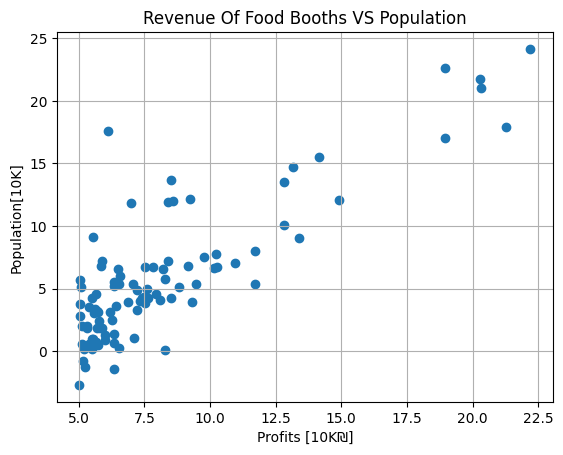

In [ ]:
plt.scatter(df_data1.X, df_data1.Y)
# adding x and y labels:
plt.xlabel('Profits [10K₪]')
plt.ylabel('Population[10K]')
# adding a title
plt.title('Revenue Of Food Booths VS Population')
plt.grid(True) # adding grid
# plt.show()

### Step 5. Implement the gradient descent algorithm
Implement the gradient descent algorithm for linear regression with a single variable using the GD_EX1.py function. The set of weights, the data set, and the learning rate must be sent to the function, which must then return the updated weights.

#### Option A - implementation using pandas

- `X` and `y` are Series objects, which represent the input features and target values, respectively. They are the inputs to the `GD_EX1` function.

- `alpha` is a scalar value that represents the learning rate, which determines how quickly the algorithm learns from the data. It is also an input to the `GD_EX1` function.

- `num_iters` is an integer value that represents the number of iterations the algorithm will run. This is also an input to the `GD_EX1` function.

- `m` is the number of training examples, which is determined by the length of `y`.


- `X` and `y` are converted to Pandas DataFrame objects so they can be concatenated.

- `df` is a DataFrame object that represents the concatenated `X` and `y` DataFrames, with the `ignore_index` parameter set to `True`.

- A bias term is added to `X` by inserting a new column at index 0 with the value of 1.

- `theta` is initialized as a NumPy array with the shape (2,) to match the shape of the concatenated `X` and `y` DataFrame.

- In the for loop, `grad` is the gradient of the cost function with respect to the weights.

- `theta` is updated using the gradient descent update rule.

- The final output `theta` is the trained weights of the linear regression model.

- Finally, the weights are printed, and a scatter plot with the fitted line is displayed.

I hope this helps! Let me know if you have any further questions.

**why we add a bias to X?**

Adding a bias term to the feature matrix X is a common practice in linear regression models, including the one used in this code. The bias term is an intercept term that allows the linear regression model to fit data that does not necessarily pass through the origin (0, 0) of the coordinate system.

In this specific code, the bias term is added to X by concatenating a column of ones to the feature matrix using the `np.concatenate` function. The resulting feature matrix `X` has shape `(m, 2)`, where `m` is the number of training examples and the second column corresponds to the bias term.

Without a bias term, the linear regression model would be of the form `y = theta*X`, where `theta` is a vector of weights. This model would force the regression line to pass through the origin of the coordinate system. However, in many cases, this is not an appropriate assumption, and adding a bias term allows the regression line to fit the data more accurately.

In [ ]:
def GD_EX1(X, y, alpha, num_iters):
    """
    Gradient descent algorithm for linear regression with a single variable.

    Args:
    X (Series): The input features, shape (m,).
    y (Series): The target values, shape (m,).
    alpha (float): The learning rate.
    num_iters (int): The number of iterations to run.

    Returns:
    ndarray: The updated weights, shape (2,).
    """
    m = len(y)  # number of training examples

    # convert X and y Series objects to DataFrame objects
    # (so they can be  concatenated)
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)

    # concatenate X and y DataFrames
    df = pd.concat([X, y], axis=1, ignore_index=True)

    # Following the definition of m, we could have avoided the concatenation and
    # instead used the dataframe if we had set it as an input.

    # add bias term to X
    df.insert(0, 'bias', 1)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    theta = np.array([0, 0])

    for i in range(num_iters):
        # calculate gradient
        grad = X.T.dot(X.dot(theta) - y) / m

        # update weights
        theta = theta - alpha * grad

    return theta.values


In this implementation, we convert the input features X and target values y into pandas Series objects, and initialize the weights to zero using a pandas Series as well. We add a bias term to the input features by concatenating a column of ones to the DataFrame using pd.concat. Then, we use pandas methods to perform the gradient descent algorithm and update the weights.

##### printing a few illustrations to clarify the function

In [ ]:
# generate sample data
X = df_data1.X
y = df_data1.Y
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 97 entries, 0 to 96
Series name: X
Non-Null Count  Dtype  
--------------  -----  
97 non-null     float64
dtypes: float64(1)
memory usage: 904.0 bytes


In [ ]:
X.shape

(97,)

In [ ]:
y.shape

(97,)

In [ ]:
X_test = pd.DataFrame(X)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       97 non-null     float64
dtypes: float64(1)
memory usage: 904.0 bytes


In [ ]:
# convert X and y Series objects to DataFrame objects
# (so they can be  concatenated)
X_concat = pd.DataFrame(X)
y_concat = pd.DataFrame(y)
X_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       97 non-null     float64
dtypes: float64(1)
memory usage: 904.0 bytes


In [ ]:
y_concat

,Y
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


In [ ]:
X_concat

,X
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598
...,...
92,5.8707
93,5.3054
94,8.2934
95,13.3940


In [ ]:
# concatenate X and y DataFrames
df = pd.concat([X_concat, y_concat], axis=1, ignore_index=True)
df

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
df_data1

,X,Y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
df_data2= df_data1
df_data2.insert(0, 'bias', 1)

In [ ]:
df_data2

,bias,X,Y
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [ ]:
 X_model = df_data2.iloc[:, :-1]
 X_model

,bias,X
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [ ]:
X_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bias    97 non-null     int64  
 1   X       97 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [ ]:
 y_model = df_data2.iloc[:, -1]
 y_model

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: Y, Length: 97, dtype: float64

In [ ]:
y_model.info()

<class 'pandas.core.series.Series'>
RangeIndex: 97 entries, 0 to 96
Series name: Y
Non-Null Count  Dtype  
--------------  -----  
97 non-null     float64
dtypes: float64(1)
memory usage: 904.0 bytes


In [ ]:
X_model_2 = df_data2[['bias', 'X']]
X_model_2

,bias,X
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [ ]:
theta_test = np.array([0, 0])
theta_test

array([0, 0])

In [ ]:
 grad = X_model_2.T.dot(X_model_2.dot(theta_test) - y) / 97
 grad

bias    -5.839135
X      -65.328850
dtype: float64

#### Use the GD_EX1 function with a sample dataset:

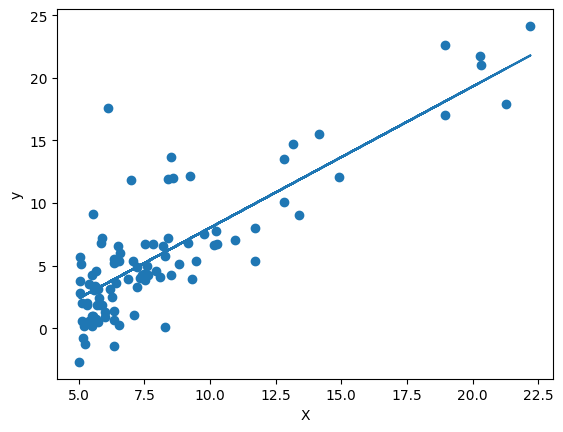

The weights are: [-3.24140214  1.1272942 ]


In [ ]:
# generate sample data (Series objects)
X = df_data1.X
y = df_data1.Y

# set hyperparameters
alpha = 0.01
num_iters = 1000

# train model using gradient descent
theta = GD_EX1(X, y, alpha, num_iters)

# plot the data points and the fitted line
plt.scatter(X, y)
plt.plot(X, theta[0] + theta[1]*X)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

print(f'The weights are: {theta}')


In this example, we generate a small sample dataset X and y, set the learning rate alpha and number of iterations num_iters, then train a linear regression model using the GD_EX1 function. Finally, we plot the data points and the fitted line, and print out the weights of the model.

#### Option B - implementation using numpy

Here's a breakdown of the variables and their shapes in the code:

- `data_1`: this is a NumPy array loaded from a text file using the `loadtxt()` function. The text file is assumed to contain comma-separated values, so `delimiter=','` is passed to the function. The shape of `data_1` is `(m, 2)`, where `m` is the number of training examples and 2 is the number of features (in this case, just one feature).

- `X`: this is a NumPy array containing the input features, with shape `(m, 1)`. The input features are extracted from `data_1` by taking the first column using `data_1[:,0]`. The `np.c_[]` function is used to concatenate the column vector with a column of ones (the bias term) to create the design matrix `X`.

- `y`: this is a NumPy array containing the target values, with shape `(m, 1)`. The target values are extracted from `data_1` by taking the second column using `data_1[:,1]`.

- `alpha`: this is a float representing the learning rate for the gradient descent algorithm.

- `num_iters`: this is an integer representing the number of iterations to run the gradient descent algorithm.

- `m`: this is an integer representing the number of training examples, which is simply the length of `y`.

- `theta`: this is a NumPy array containing the weights for the linear regression model. It is initialized to `[0, 0]` and reshaped to `(2, 1)` using the `reshape()` method. Alternatively, it could be initialized using `np.zeros(2)`.

- `X`: this is a NumPy array containing the design matrix for the linear regression problem, with shape `(m, 2)` (including the bias term).

- `grad`: this is a NumPy array containing the gradient of the cost function with respect to `theta`. It is calculated using the formula `X.T.dot(X.dot(theta) - y) / m`, which involves matrix multiplication and subtraction.

- `theta`: this is updated in each iteration of the gradient descent algorithm using the formula `theta = theta - alpha * grad`.

- `theta.squeeze()`: this is the final output of the function, which returns the updated weights as a 1D NumPy array with shape `(2,)`. The `squeeze()` method is used to remove any singleton dimensions, since the weights were initialized with a shape of `(2, 1)` but we only need a 1D array to plot the results.


reading data using

In [ ]:
data_1 = np.loadtxt("/content/drive/My Drive/machine learning/Lecture 2 summary/Exercise 2/Exercise files/ex1data1.txt", delimiter=',')
X = np.c_[data_1[:,0]]
y = np.c_[data_1[:,1]]

Set up the exercise's key parameters:

In [ ]:
theta = np.zeros([2,1])
# number of iteration we would like the run the function we will implement
iterations = 1500
m = len(y)
alpha = 0.01
#define column of 1's, for present theta0 (according to the theory, theta_0 will always be a column of 1's)
ones = np.ones((m,1))
X = np.c_[np.ones(len(data_1)),data_1[:,0]]
m, n = X.shape
print('Number of training examples (m): %.0f'%(m))
print('Number of features (n): %.0f'%(n))
#a matrix we will use for the functions we will implement
J_history = []

Number of training examples (m): 97
Number of features (n): 2


Implement the cost function's calculation, J:

In [ ]:
def computeCost(X, y, theta):
    dot_res = np.dot(X, theta) - y
    return np.sum(np.power(dot_res, 2)) / (2*m)

We will determine the first cost result for the initial run

In [ ]:
J = computeCost(X, y, theta)
print(J)

32.072733877455676


Implement the gradient descent algorithm for linear regression with a single variable using the GD_EX1_1.py function:

In [ ]:
def GD_EX1_1(X, y, theta, alpha, iterations):

    for iter in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Running the Gradient Descent algorithm and finding the optimal theta's accordingly

In [ ]:
new_theta, J_history = GD_EX1_1(X, y, theta, alpha, iterations)

print('\t theta_0(Intercept): %.3f'%(new_theta[0]))
print('\t theta_1(Slope): %.3f'%(new_theta[1]))

	 theta_0(Intercept): -3.630
	 theta_1(Slope): 1.166


With the optimal theta's, calculating the new cost derivates from them.

In [ ]:
new_cost = computeCost(X,y,new_theta)
print('\t Cost value: %.3f' %(new_cost))

	 Cost value: 4.483


As we may see, the new cost, 4.48 is less than the initial cost, 32.07, i.e. the algorithm indeed found the optimal values (theta's) for the minimum cost.

Now we will see the linear fit we've received, and check if it is as expected

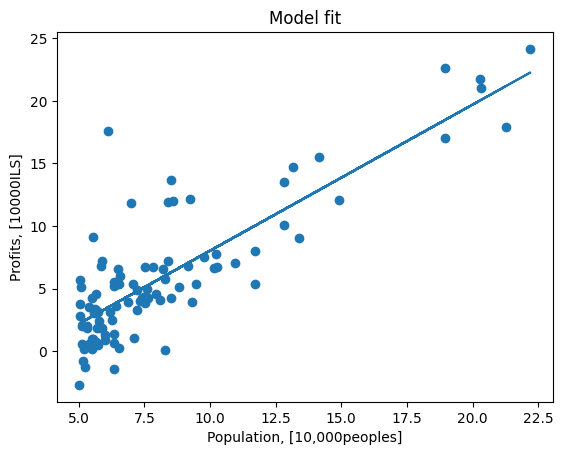

In [ ]:
plt.scatter(X[:,1], y)
plt.xlabel("Population, [10,000peoples]")
plt.ylabel("Profits, [10000ILS]")
plt.title('Model fit')
plt.plot(X[:,1], np.dot(X, new_theta))
plt.show()

We choose the learning rate to be: alpha = 0.01, and now we will show a plot of Cost VS Number of iteration, to show that indeed after several iterations the cost function will converge to a minumum value.

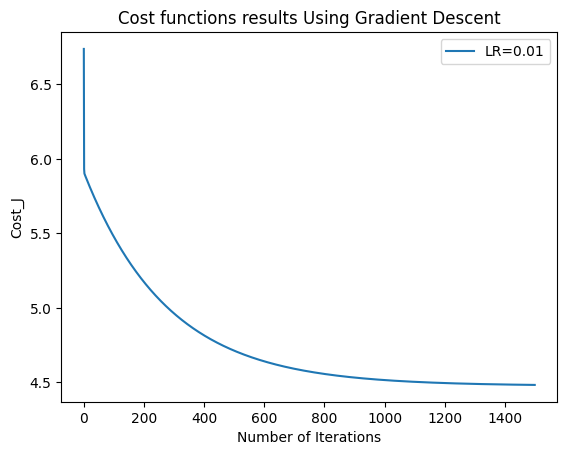

In [ ]:
plt.plot(J_history, label='LR=0.01')
plt.ylabel('Cost_J')
plt.xlabel('Number of Iterations')
plt.title('Cost functions results Using Gradient Descent')
plt.legend()

### Step 6. Plot the cost function as a function of the number of iterations

#### Option A - implementation using Pandas


To plot the cost function as a function of the number of iterations for multiple learning rates, we need to modify the GD_EX1 function to return both the updated weights theta and the cost function J at each iteration. Then, we can plot the cost function J against the number of iterations for different learning rates.

The modified code:

In [ ]:
def GD_EX1(X, y, alpha, num_iters):
    """
    Gradient descent algorithm for linear regression with a single variable.

    Args:
    X (Series): The input features, shape (m,).
    y (Series): The target values, shape (m,).
    alpha (float): The learning rate.
    num_iters (int): The number of iterations to run.

    Returns:
    tuple: The updated weights, shape (2,), and the cost function at each iteration.
    """
    m = len(y)  # number of training examples

    # convert X and y Series objects to DataFrame objects
    # (so they can be concatenated)
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)

    # concatenate X and y DataFrames
    df = pd.concat([X, y], axis=1, ignore_index=True)

    # add bias term to X
    df.insert(0, 'bias', 1)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    theta = np.array([0, 0])
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        # calculate cost function
        h = X.dot(theta)
        J_history[i] = ((h - y)**2).sum() / (2*m)

        # calculate gradient
        grad = X.T.dot(h - y) / m

        # update weights
        theta = theta - alpha * grad

    return theta, J_history

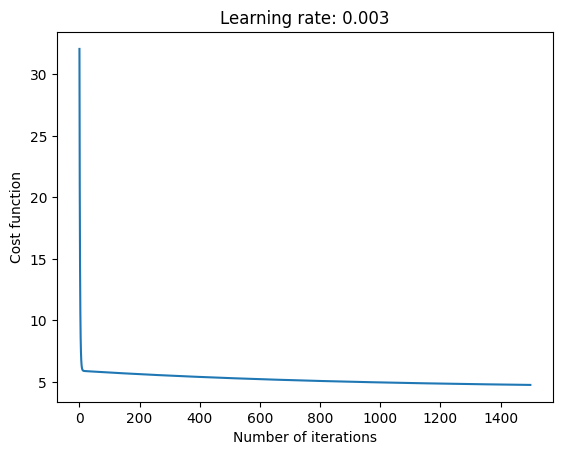

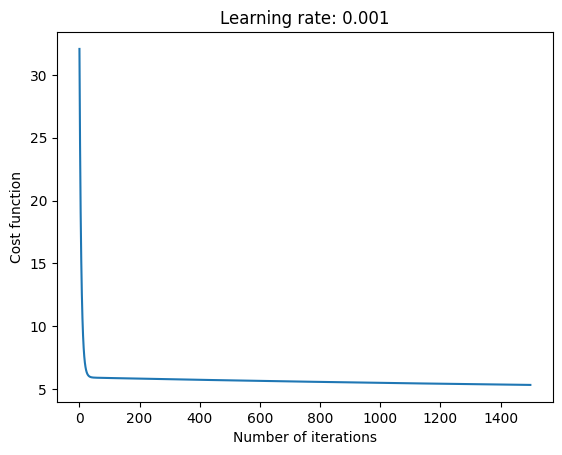

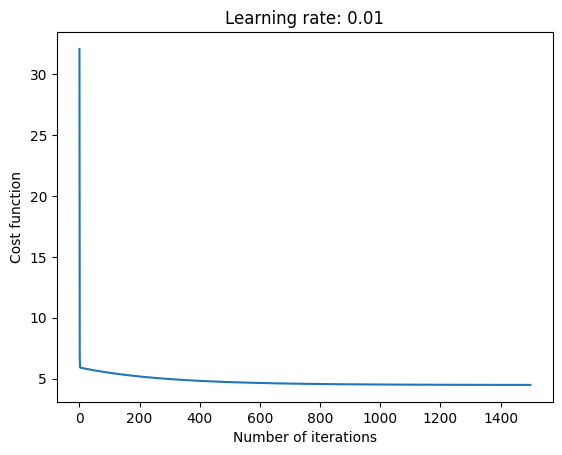

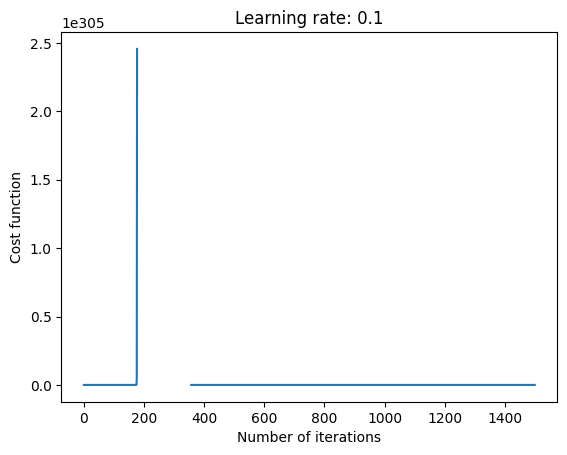

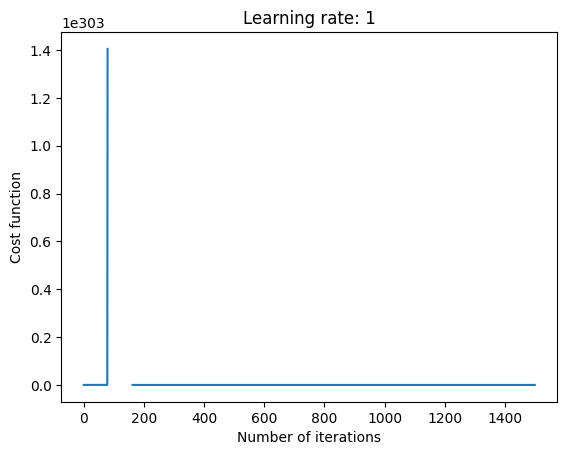

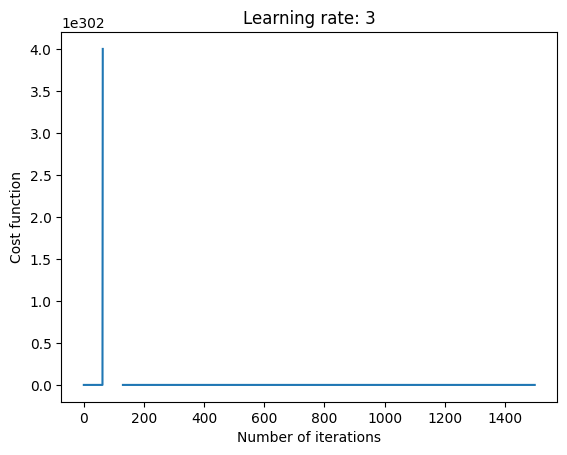

In [ ]:
# generate sample data (Series objects)
X_1 = df_data1.X
y_1 = df_data1.Y

# set hyperparameters
alpha_values = [0.003, 0.001, 0.01, 0.1, 1, 3]  # different learning rates
num_iters = 1500

# train models using gradient descent with different learning rates
results = []
for alpha in alpha_values:
    theta_1, J_history = GD_EX1(X_1, y_1, alpha, num_iters)
    results.append((alpha, theta_1, J_history))

# plot the cost function as a function of the number of iterations for different learning rates
for alpha, theta, J_history in results:
    plt.plot(range(num_iters), J_history, label=f'alpha={alpha}')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost function')
    plt.title(f'Learning rate: {alpha}')
    plt.show()


#### Option B - implementation using numpy

Learning rate, alpha, equals to 0.001

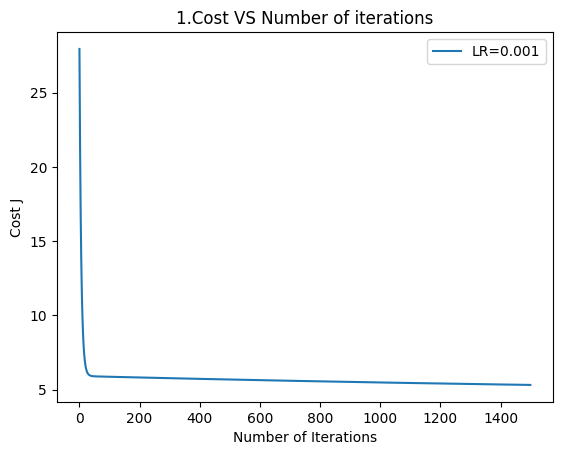

In [ ]:
theta = np.zeros([2,1])
J_history = []

theta, J_history = GD_EX1_1(X, y, theta, 0.001, iterations)
new_cost = computeCost(X,y,theta)
# Plot
plt.plot(J_history, label='LR=0.001')
plt.title('1.Cost VS Number of iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')

plt.legend()

Learning rate, alpha, equals to 0.003

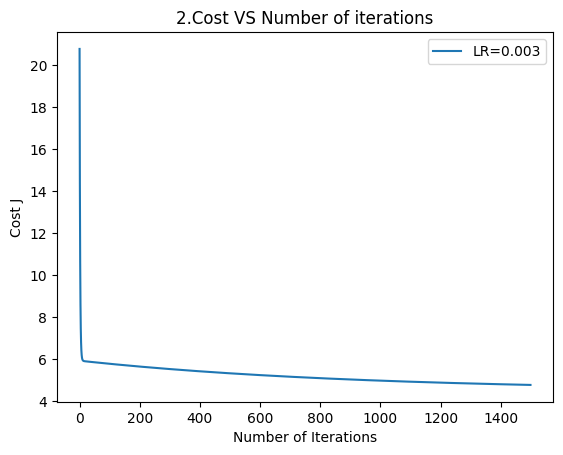

In [ ]:
theta = np.zeros([2,1])
J_history = []

theta, J_history = GD_EX1_1(X, y, theta, 0.003, iterations)
new_cost = computeCost(X,y,theta)

plt.plot(J_history, label='LR=0.003')
plt.title('2.Cost VS Number of iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.legend()

Learning rate, alpha, equals to 0.01

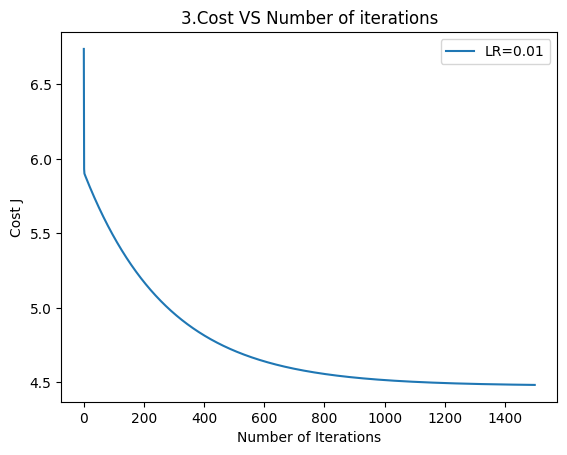

In [ ]:
theta = np.zeros([2,1])
J_history = []

theta, J_history = GD_EX1_1(X, y, theta, 0.01, iterations)
new_cost = computeCost(X,y,theta)

plt.plot(J_history, label='LR=0.01')
plt.title('3.Cost VS Number of iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.legend()

Learning rate, alpha, equals to 0.03

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-233-41896484180e>:3: RuntimeWarning: overflow encountered in power
  return np.sum(np.power(dot_res, 2)) / (2*m)


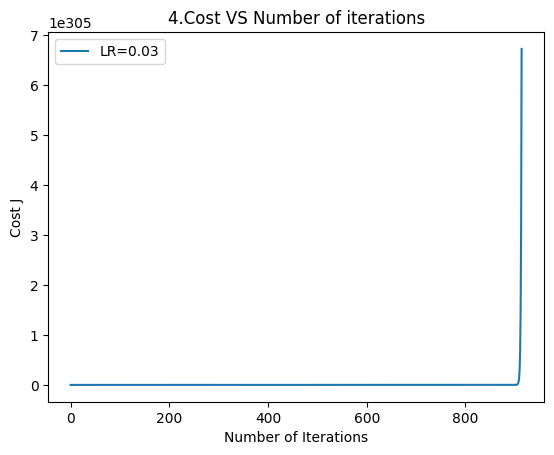

In [ ]:
theta = np.zeros([2,1])
J_history = []

theta, J_history = GD_EX1_1(X, y, theta, 0.03, iterations)
new_cost = computeCost(X,y,theta)

plt.plot(J_history, label='LR=0.03')
plt.title('4.Cost VS Number of iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.legend()

Learning rate, alpha, equals to 0.1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-233-41896484180e>:3: RuntimeWarning: overflow encountered in power
  return np.sum(np.power(dot_res, 2)) / (2*m)
<ipython-input-235-775a1473b420>:6: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m) * temp


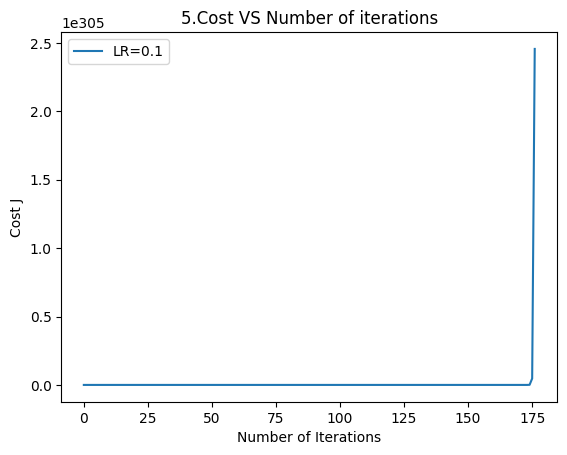

In [ ]:
theta = np.zeros([2,1])
J_history = []

theta, J_history = GD_EX1_1(X, y, theta, 0.1, iterations)
new_cost = computeCost(X,y,theta)

plt.plot(J_history, label='LR=0.1')
plt.title('5.Cost VS Number of iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.legend()

Learning rate, alpha, equals to 0.3

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-233-41896484180e>:3: RuntimeWarning: overflow encountered in power
  return np.sum(np.power(dot_res, 2)) / (2*m)
<ipython-input-235-775a1473b420>:6: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m) * temp


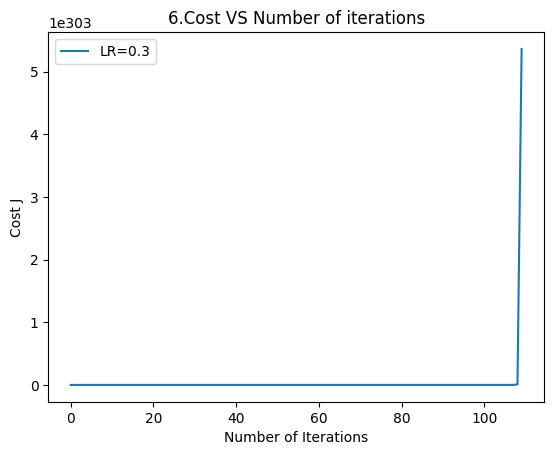

In [ ]:
theta = np.zeros([2,1])
J_history = []

theta, J_history = GD_EX1_1(X, y, theta, 0.3, iterations)
new_cost = computeCost(X,y,theta)

plt.plot(J_history, label='LR=0.3')
plt.title('6.Cost VS Number of iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.legend()

Learning rate, alpha, equals to 1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-233-41896484180e>:3: RuntimeWarning: overflow encountered in power
  return np.sum(np.power(dot_res, 2)) / (2*m)
<ipython-input-235-775a1473b420>:6: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m) * temp


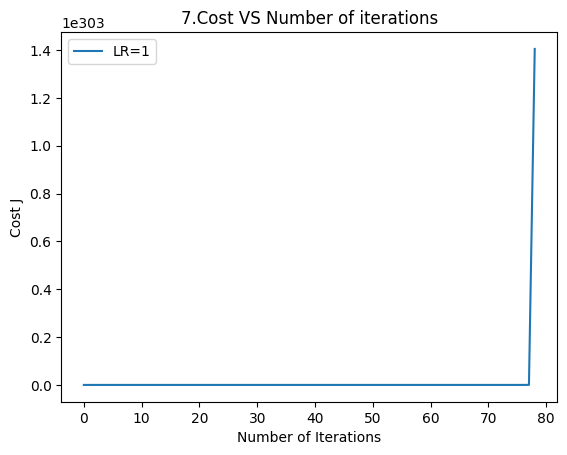

In [ ]:
theta = np.zeros([2,1])
J_history = []

theta, J_history = GD_EX1_1(X, y, theta, 1, iterations)
new_cost = computeCost(X,y,theta)

plt.plot(J_history, label='LR=1')
plt.title('7.Cost VS Number of iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.legend()

In gradient descent, the learning rate (alpha) is a hyperparameter that controls the size of the steps taken during each update of the weights.

Choosing the right learning rate is important, because if the learning rate is too small, the algorithm will take a long time to converge to a solution, while if the learning rate is too large, the algorithm may fail to converge to a solution or even diverge.

Therefore, it is necessary to experiment with different learning rates and find the one that produces the best results. This is why in this code, the gradient descent algorithm is run multiple times with different learning rates, and the cost function is plotted as a function of the number of iterations for each learning rate. This allows us to compare the performance of the algorithm with different learning rates and choose the one that produces the lowest cost function (i.e., the best fit to the data).

### Step 7. For appropriate theta1 and theta0 values, plot the cost function as a three-dimensional surface and a contour map

For the purposes of this exercise and for the sake of convenience, I will be exclusively utilizing the NumPy library.

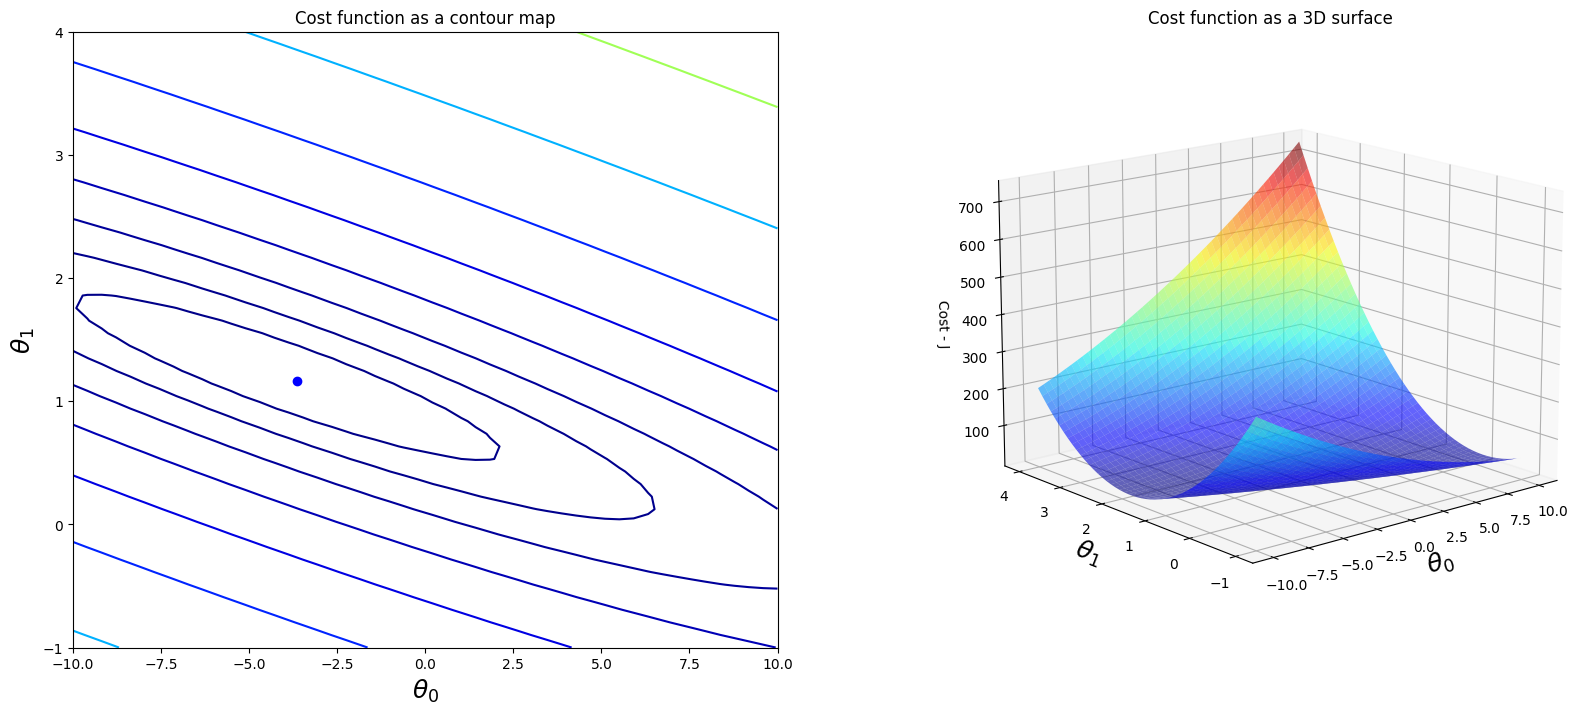

In [ ]:
# Define grid axis values for the plotting
theta0_axis = np.linspace(-10, 10, 50) # define axis for theta0 grid
theta1_axis = np.linspace(-1, 4, 50)# define axis for theta1 grid

theta0_grid, theta1_grid = np.meshgrid(theta0_axis, theta1_axis, indexing='xy') # create mesh grid of theta0 and theta1
Cost_3d = np.zeros((theta0_axis.size,theta1_axis.size)) # create grid of zeros from cost values

# Calculate the Cost function - values based on grid of coefficients
for (i,j),v in np.ndenumerate(Cost_3d): #loop through the Cost grid. double for loop
    theta_3d = [[theta0_grid[i,j]], [theta1_grid[i,j]]] #create a value of theta, which relevant for the iteration
    Cost_3d[i,j] = computeCost(X, y, theta_3d) #running the cost function for the given values of theta

fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection = '3d')

# Left plot
ax1.contour(theta0_grid, theta1_grid, Cost_3d, np.logspace(-2, 3, 20), cmap = plt.cm.jet)
ax1.scatter(new_theta[0],new_theta[1], c = 'b') # plot the final theta values, left plot
ax1.set_title('Cost function as a contour map')


# Right plot
ax2.plot_surface(theta0_grid, theta1_grid, Cost_3d, rstride = 1, cstride = 1, alpha = 0.6, cmap = plt.cm.jet)
ax2.set_zlabel('Cost - J')
ax2.set_zlim(Cost_3d.min(), Cost_3d.max())
ax2.set_title('Cost function as a 3D surface')
ax2.view_init(elev = 15, azim = 230)

# Define labels for x and y labels for both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=18)
    ax.set_ylabel(r'$\theta_1$', fontsize=18)